<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/homework_1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# batch size = 64
bs = 64
# bs = 16

In [0]:
# path = untar_data(URLs.FOOD); path

In [6]:
path = untar_data("https://s3.amazonaws.com/fast-ai-imageclas/food-101")


In [0]:
# ! rm /root/.fastai/data/food-101/images/pork_chop/25893.jpg

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='images', valid_pct = 0.25, bs = bs, ds_tfms = tfms, size = 224).normalize(imagenet_stats)

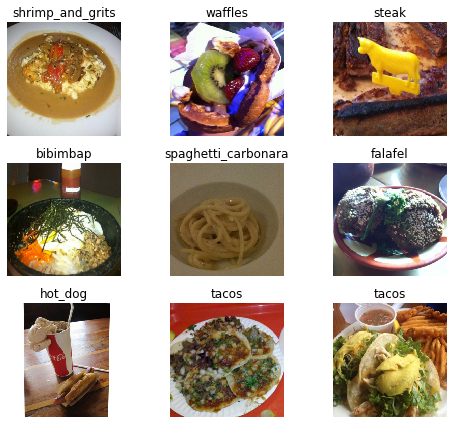

In [9]:
data.show_batch(rows=3, figsize=(7,6))

## resnet34

In [10]:
# building a resnet34 model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [11]:
learn.fit(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.959070,1.541441,0.399842,25:37


In [0]:
learn.save(root_dir+'stage-1')

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.load(root_dir+'stage-1', strict=False, remove_module=True)

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beignets,beignets,beignets,beignets,beignets
Path: /root/.fastai/data/food-101;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chocolate_mousse,scallops,grilled_salmon,bread_pudding,sashimi
Path: /root/.fastai/data/food-101;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

# Results

In [15]:
! ls /root/.fastai/data/food-101/images/pork_chop/25893.jpg

/root/.fastai/data/food-101/images/pork_chop/25893.jpg


In [16]:
interpret = ClassificationInterpretation.from_learner(learn)

In [0]:
loss, indexes = interpret.top_losses()

In [19]:
loss

tensor([3.1479e+01, 3.0725e+01, 3.0722e+01,  ..., 3.9380e-02, 2.4746e-02,
        1.9107e-04])

In [20]:
indexes

tensor([18322, 24184, 17400,  ..., 23052,  1903, 24355])

In [22]:
len(data.valid_ds)==len(loss)==len(indexes)


True

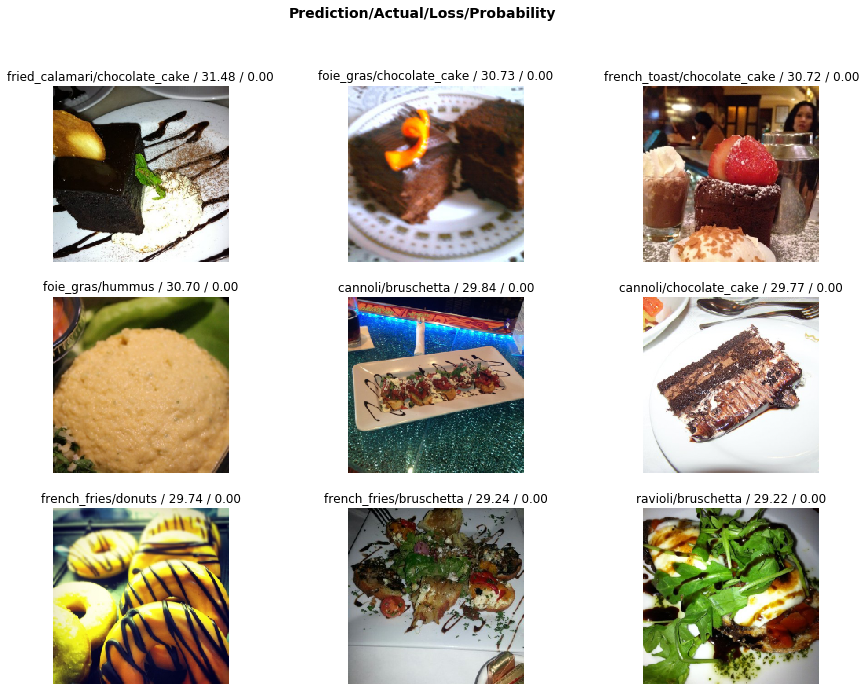

In [23]:
interpret.plot_top_losses(9, figsize=(15,11))


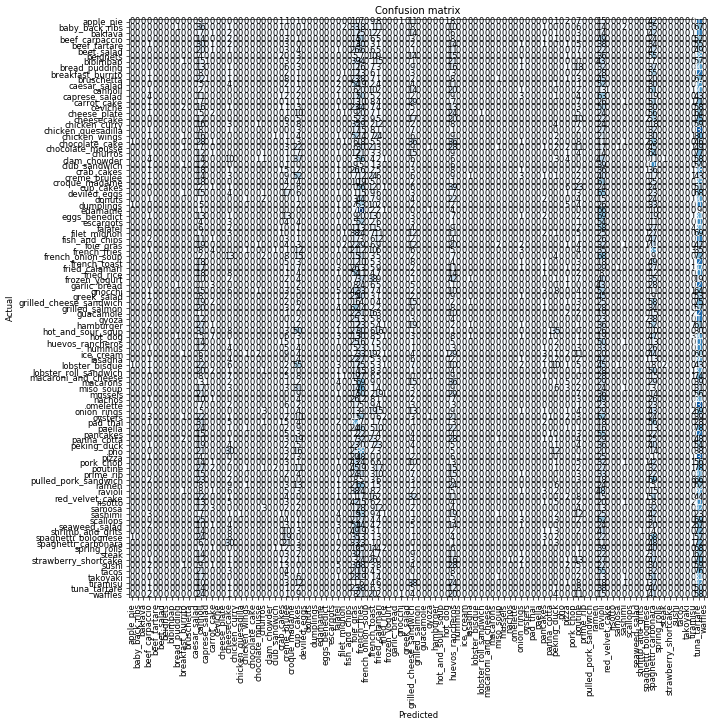

In [25]:
interpret.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [26]:
interpret.most_confused(min_val=2)

[('edamame', 'french_fries', 160),
 ('omelette', 'tuna_tartare', 137),
 ('chicken_quesadilla', 'tuna_tartare', 134),
 ('pizza', 'tuna_tartare', 130),
 ('guacamole', 'tuna_tartare', 126),
 ('pancakes', 'tuna_tartare', 123),
 ('breakfast_burrito', 'tuna_tartare', 121),
 ('french_toast', 'tuna_tartare', 121),
 ('garlic_bread', 'tuna_tartare', 121),
 ('apple_pie', 'tuna_tartare', 117),
 ('gyoza', 'tuna_tartare', 116),
 ('fish_and_chips', 'tuna_tartare', 113),
 ('baklava', 'tuna_tartare', 111),
 ('dumplings', 'tuna_tartare', 108),
 ('huevos_rancheros', 'tuna_tartare', 107),
 ('escargots', 'tuna_tartare', 104),
 ('hummus', 'tuna_tartare', 104),
 ('club_sandwich', 'spaghetti_carbonara', 103),
 ('risotto', 'tuna_tartare', 103),
 ('fried_rice', 'tuna_tartare', 101),
 ('crab_cakes', 'tuna_tartare', 98),
 ('fried_calamari', 'tuna_tartare', 97),
 ('caesar_salad', 'tuna_tartare', 95),
 ('samosa', 'tuna_tartare', 92),
 ('tiramisu', 'tuna_tartare', 92),
 ('prime_rib', 'tuna_tartare', 91),
 ('bread_pu

# Unfreezing the Model

In [0]:
# unfreeze the model and do more training
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,1.422524,1.129826,0.295683,26:00


In [30]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


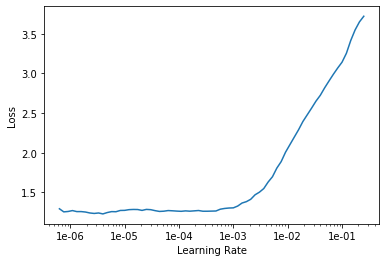

In [31]:
learn.recorder.plot()

In [32]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.191599,1.048509,0.277505,25:12
1,1.134086,1.021067,0.270495,24:56


# Resnet 50

In [33]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
